In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import util as UT
import catalog as Cat
import evolver as Evo
import test_evolver as testEvo

In [2]:
theta = Evo.defaultTheta('random_step_abias')
for key in theta.keys(): 
    print key, theta[key]

gv {'slope': 1.03, 'fidmass': 10.5, 'offset': -0.02}
fq {'name': 'cosmos_tinker'}
sfms {'mslope': 0.53, 'name': 'linear', 'zslope': 1.05}
fpq {'slope': -2.079703, 'fidmass': 10.5, 'offset': 1.6153725}
sfh {'sigma_tot': 0.3, 'dt_min': 1.0, 'sigma_corr': 0.2, 'name': 'random_step_abias', 'dt_max': 1.0}
mass {'f_retain': 0.6, 't_step': 0.05, 'solver': 'euler'}


In [3]:
sig_smhm = 0.2
nsnap0=15

### If there's no assembly bias then it should be the same as random steps
First SFH = `random step`, which has no assembly bias by construction

assignSFRs takes  1.80516195297


evolver.py:288: RuntimeWarning: invalid value encountered in divide
  qf.model(mf[0], z_i, lit=theta_fq['name']) * dmf_dt[1] / mf[1])
evolver.py:300: RuntimeWarning: invalid value encountered in less
  quenches = np.where(rand_Pq < Pq_Msham)  # these SFing galaxies quench
evolver.py:293: RuntimeWarning: divide by zero encountered in divide
  Pq_M_fid_interp(mm) / (1. - qf.model(mm, z_i, lit=theta_fq['name']))
evolver.py:288: RuntimeWarning: divide by zero encountered in divide
  qf.model(mf[0], z_i, lit=theta_fq['name']) * dmf_dt[1] / mf[1])


89.182459116


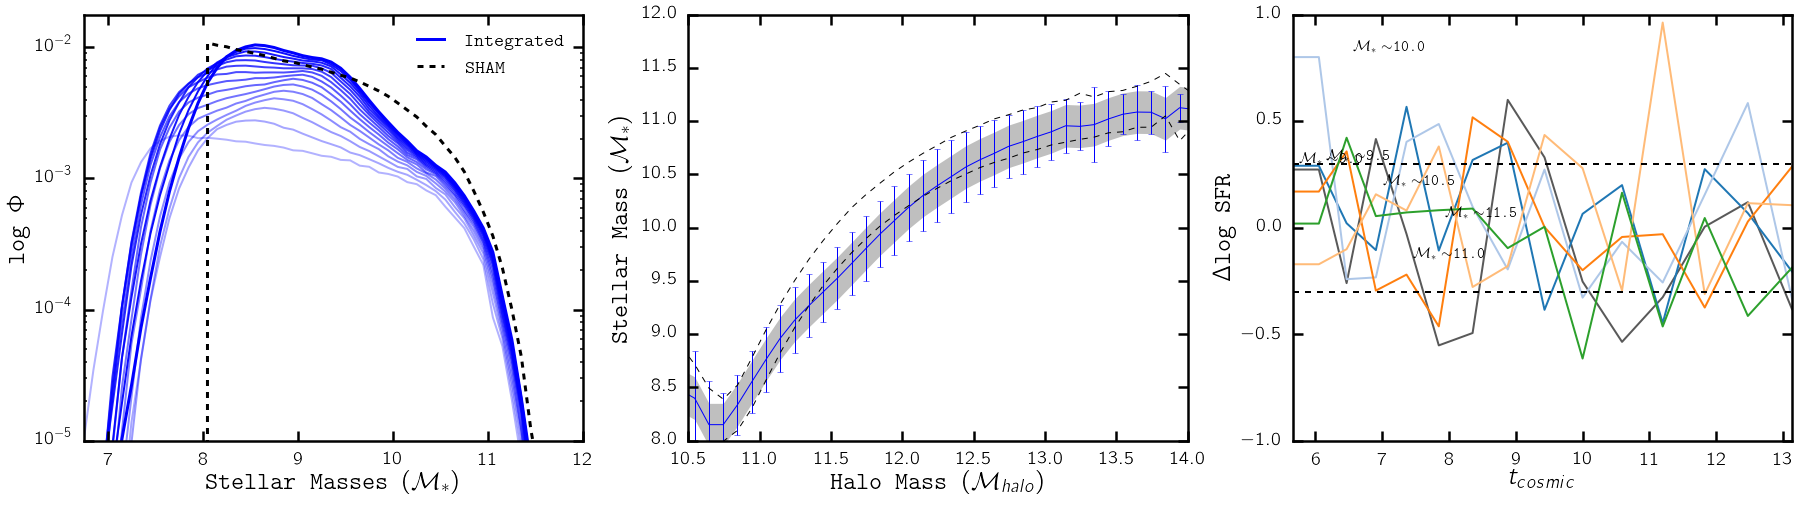

In [4]:
# random step (NO ASSEMBLY BIAS)
theta['sfh'] = {'name': 'random_step', 'dt_min': 0.5, 'dt_max': 0.5, 'sigma': 0.3}
subhist = Cat.PureCentralHistory(sigma_smhm=sig_smhm, nsnap_ancestor=nsnap0)
subcat = subhist.Read()

eev = Evo.Evolver(subcat, theta, nsnap0=nsnap0)
eev.Initiate()

eev.Evolve()
subcat = eev.SH_catalog

testEvo.EvolverQAplots(subcat, theta)
plt.show()

`random_step_abias` with $\sigma_{corr} = 0$

assignSFRs takes  1.28969717026
75.8448431492


/usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.

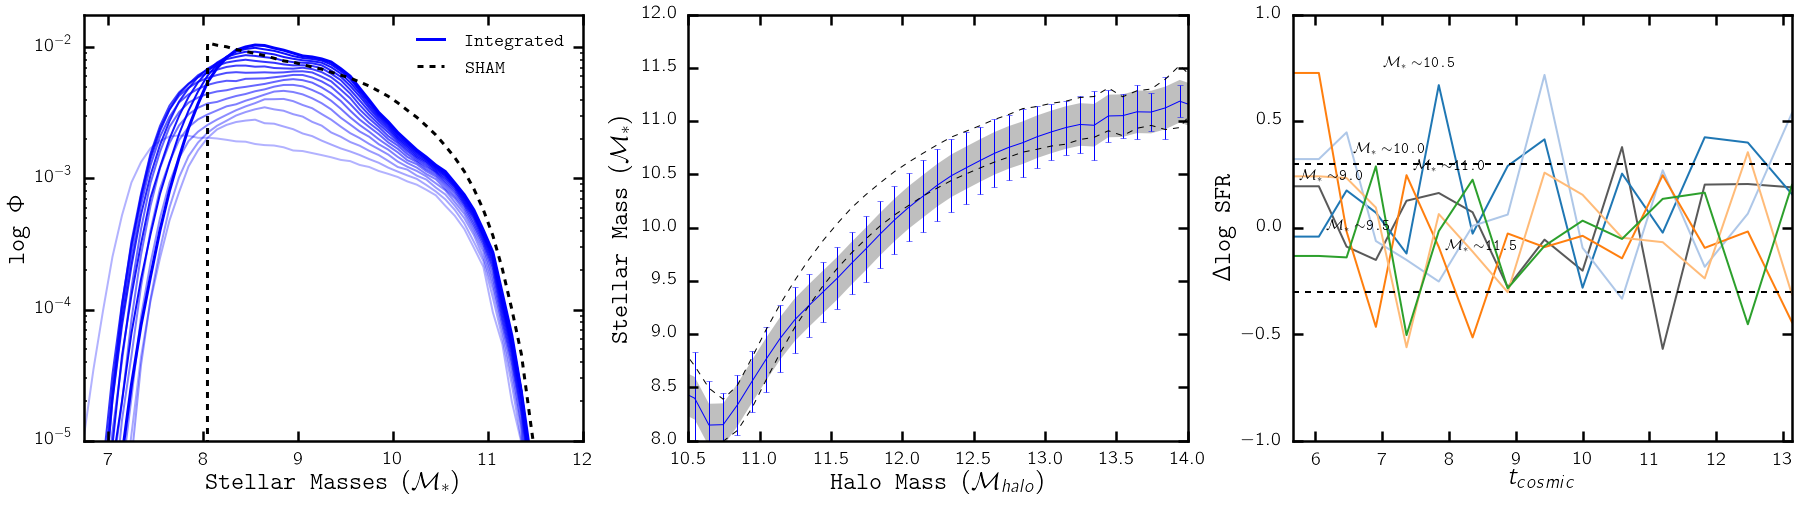

In [5]:
# random step with ASSEMBLY BIAS set to 0 
theta['sfh'] = {'name': 'random_step_abias', 'sigma_tot': 0.3, 'sigma_corr': 0.0, 'dt_min': 0.5, 'dt_max': 0.5, 'sigma': 0.3}
subhist = Cat.PureCentralHistory(sigma_smhm=sig_smhm, nsnap_ancestor=nsnap0)
subcat = subhist.Read()

eev = Evo.Evolver(subcat, theta, nsnap0=nsnap0)
eev.Initiate()

eev.Evolve()
subcat = eev.SH_catalog

testEvo.EvolverQAplots(subcat, theta)
plt.show()

### Now we crank up the assembly bias

assignSFRs takes  1.2359650135
94.2428209782


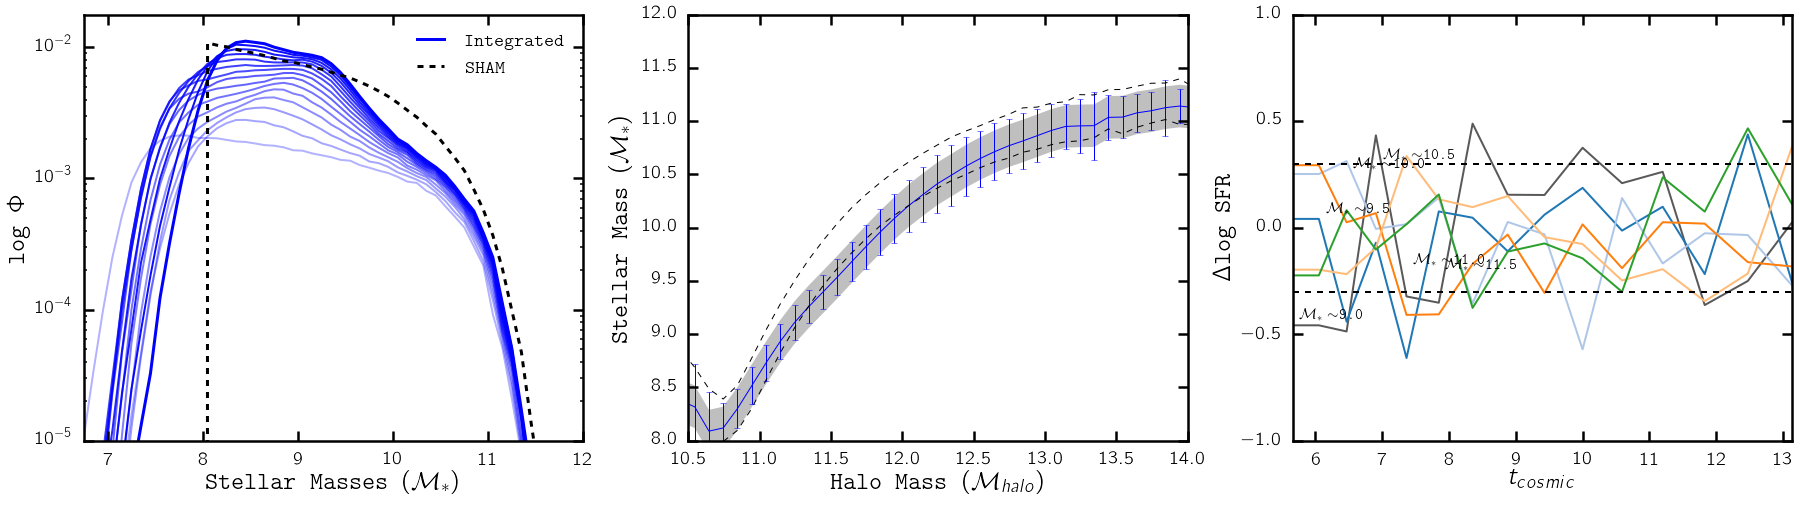

In [6]:
# random step with ASSEMBLY BIAS set to max
theta['sfh'] = {'name': 'random_step_abias', 'sigma_tot': 0.3, 'sigma_corr': 0.3, 'dt_min': 0.5, 'dt_max': 0.5, 'sigma': 0.3}
subhist = Cat.PureCentralHistory(sigma_smhm=sig_smhm, nsnap_ancestor=nsnap0)
subcat = subhist.Read()

eev = Evo.Evolver(subcat, theta, nsnap0=nsnap0)
eev.Initiate()

eev.Evolve()
subcat = eev.SH_catalog

testEvo.EvolverQAplots(subcat, theta)
plt.show()

### Lets check if assembly bias is being induced properly

assignSFRs takes  1.19384288788
76.136826992
assignSFRs takes  1.17232108116
77.5813751221


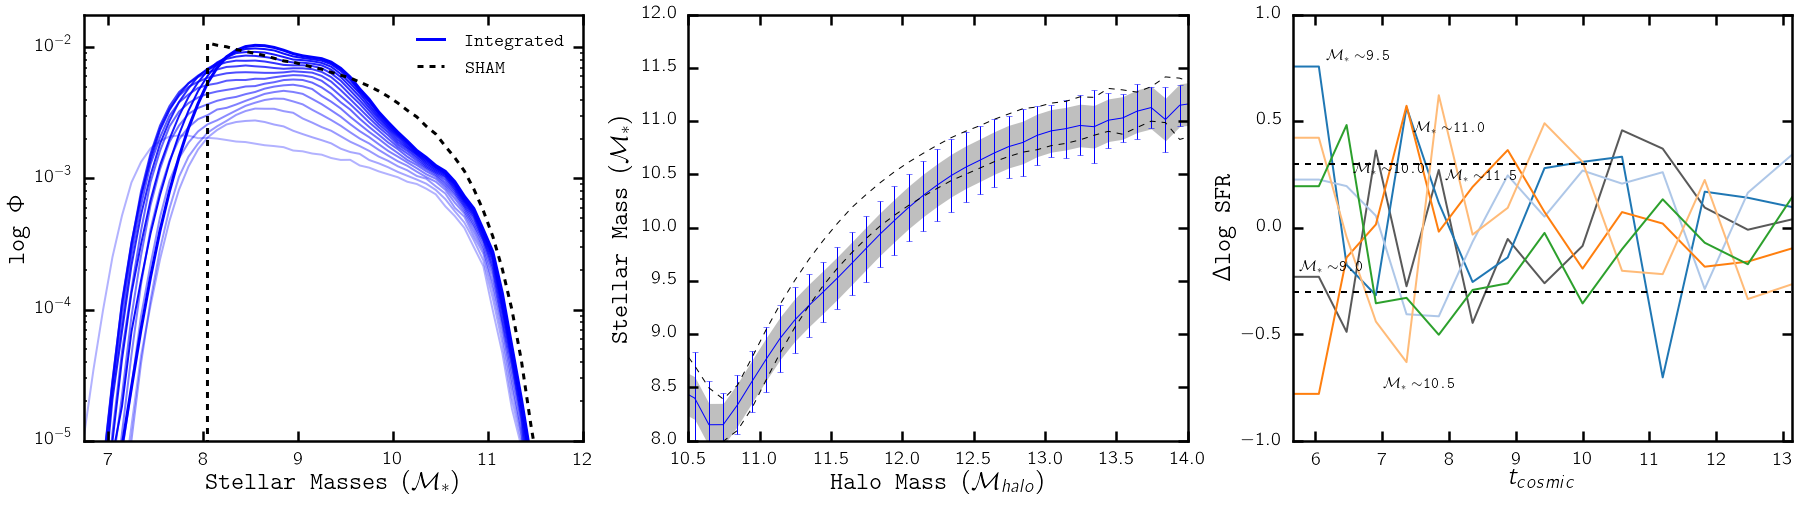

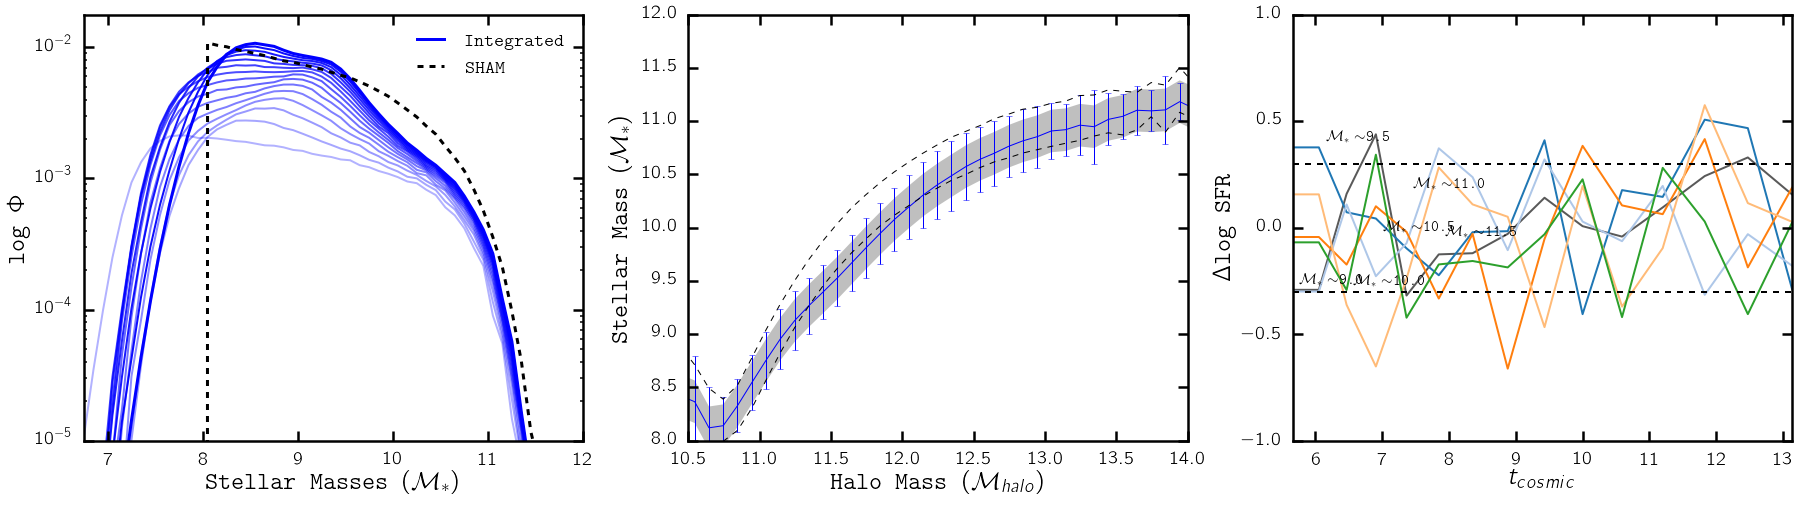

In [7]:
# lets change around sigma_corr (the correlation between dMhalo and dlogSFR)
for sig in [0., 0.1]:#, 0.2, 0.3]: 
    theta['sfh']['sigma_corr'] = sig
    
    subhist = Cat.PureCentralHistory(sigma_smhm=sig_smhm, nsnap_ancestor=nsnap0)
    subcat = subhist.Read()
    
    eev = Evo.Evolver(subcat, theta, nsnap0=nsnap0)
    eev.Initiate()
    
    eev.Evolve()
    subcat = eev.SH_catalog
    
    testEvo.EvolverQAplots(subcat, theta)
plt.show()

In [8]:
# random step with ASSEMBLY BIAS set to 0 
theta['sfh'] = {'name': 'random_step_abias', 'sigma_tot': 0.3, 'sigma_corr': 0.0, 'dt_min': 0.5, 'dt_max': 0.5}

subhist = Cat.PureCentralHistory(sigma_smhm=sig_smhm, nsnap_ancestor=nsnap0)
subcat = subhist.Read()

eev = Evo.Evolver(subcat, theta, nsnap0=nsnap0)
eev.Initiate()

eev.Evolve()
subcat = eev.SH_catalog

assignSFRs takes  1.53816819191
78.9428761005


[-534.89897632 -534.49954232 -534.68994416 ..., -534.59418737 -534.64586064
 -535.10762988]


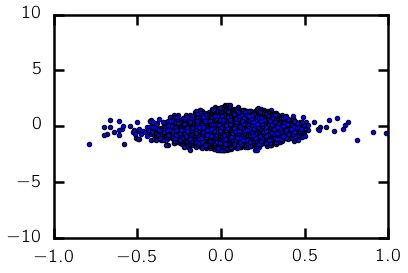

In [16]:
isSF = np.where((subcat['gclass'] == 'star-forming') & (subcat['nsnap_start'] >= 11))[0]
plt.scatter(subcat['snapshot10_halo.m'][isSF] - subcat['snapshot11_halo.m'][isSF], subcat['snapshot11_sfr'][isSF])
sfrs = subcat['snapshot11_sfr'][isSF]
print sfrs[np.where(sfrs < -10)]
plt.ylim([-10., 10.])
plt.xlim([-1., 1.])
plt.show()

In [22]:
print isSF[np.where(sfrs < -10)[0][1]]

64


In [26]:
print subcat['nsnap_start'][64]
for i in range(2, 14): 
    print i, subcat['snapshot'+str(i)+'_m.star'][64], subcat['snapshot'+str(i)+'_sfr'][64], subcat['snapshot'+str(i)+'_halo.m'][64], subcat['snapshot'+str(i)+'_m.sham'][64]

11
2 8.62078215658 -1.2356599112 11.0274124146 8.91834449768
3 8.60581793179 -1.20205215961 11.0330162048 8.63008785248
4 8.57807248745 -1.16938404903 11.0346040726 8.50359249115
5 8.50153690081 -0.60268352624 11.0134935379 8.62908649445
6 8.44751258451 -1.35870554156 11.0076303482 8.82171154022
7 8.37340360216 -0.805736348149 10.9743413925 8.22394561768
8 8.23230513878 -0.698900855047 10.932311058 8.03986263275
9 8.06724885354 -0.612204426346 10.9117736816 7.78819608688
10 7.72065112738 -1.02359222587 10.9064836502 7.59819459915
11 -999.0 -534.499542323 10.9107208252 7.4166765213
12 -999.0 -534.388827812 10.8824110031 0.0
13 -999.0 -534.293907812 10.886888504 0.0


In [25]:
for i in range(2, 14): 
    print subcat['snapshot'+str(i)+'_sfr'][np.where(subcat['nsnap_start'] == i)]

[-535.21755088 -534.8300811  -534.87301669 ..., -535.18766762 -535.581547
 -999.        ]
[-535.30973302 -535.0748268  -534.97415704 ..., -534.50039113 -535.10898597
 -535.0949084 ]
[-534.23254769 -534.70481414 -535.25846895 ..., -535.26243509 -534.90550074
 -535.19025844]
[-534.7552772  -535.00815314 -535.0580179  ..., -534.70573729 -535.58245947
 -534.82213395]
[-534.89995405 -534.75653311 -534.91690857 ..., -534.91261088 -534.72562407
 -534.83566511]
[-534.74303861 -534.44604694 -534.85615801 ..., -534.16306832 -535.42783075
 -534.74843853]
[-534.85252455 -534.60654393 -534.83794664 ..., -534.10602142 -534.76727098
 -534.91051851]
[-534.41321488 -534.79621227 -534.87607889 ..., -534.4387467  -534.32845036
 -534.44403398]
[-534.2431967  -534.44015382 -534.25585284 ..., -534.51760527 -533.98945652
 -534.1195757 ]
[-534.89897632 -534.49954232 -534.68994416 ..., -534.59418737 -534.64586064
 -535.10762988]
[-534.19662823 -534.49030313 -534.34029615 ..., -534.45029533 -534.48213713
 -534.

In [ ]:
k